In [1]:
# Dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
from api_keys import weather_api_key
from citipy import citipy
import numpy as np 
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
#set ranges of lat and longs

lat_range = (-90, 90)
long_range = (-180, 180)
latitudes = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
longitudes = np.random.uniform(long_range[0], long_range[1], size = 1500)

lat_long = zip(latitudes, longitudes)

In [3]:
#500 random cities
#Latitude values range from -90° to +90°. Longitude range from -180° to 180°

cities = []
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1])
    if city.city_name not in cities:    
        cities.append(city.city_name)
    
    


In [4]:
len(cities)

629

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather"

parameters = {
    "appid": weather_api_key,
    "units": "imperial"
}

In [6]:
parameters["q"]=cities[0]
r = requests.get(url, parameters).json()
print(r)

{'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -25.6, 'feels_like': -33.93, 'temp_min': -25.6, 'temp_max': -25.6, 'pressure': 1033, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1611760333, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1611768731, 'sunset': 1611791276}, 'timezone': -25200, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}


In [7]:
print("Beginning Data Retrieval")   
print("-----------------------------")

city_data = []

#look back at weatherpy print records and count when reviewing hw 
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i%50==0 and i>=50):
        set_count += 1 
        record_count = 0 
        
    url = "http://api.openweathermap.org/data/2.5/weather"

    parameters = {
    "appid": weather_api_key,
    "units": "imperial"
    }  
    
    parameters["q"]=city
   # print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    try:
        r = requests.get(url, parameters).json()
        

        city_data.append({
            "name":r["name"],
            "Latitude": r["coord"]["lat"],
            "Longitude": r["coord"]["lon"],
            "Temp_Max": r["main"]["temp_max"],
            "Humidity": r["main"]["humidity"],
            "Cloudiness": r["clouds"]["all"],
            "Wind Speed": r["wind"]["speed"],
            "Country": r["sys"]["country"],
            "Date": r["dt"]
        
        })
        
    except:
       # print("City not found. Skipping...")
        pass
#print("-----------------------------")
#print("Data Retrieval Complete")
#print("-----------------------------")


Beginning Data Retrieval
-----------------------------


In [8]:
df = pd.DataFrame(city_data)
df

,name,Latitude,Longitude,Temp_Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,-25.60,68,75,2.30,CA,1611760334
1,Sørland,67.6670,12.6934,33.80,69,40,24.61,NO,1611760334
2,Hermanus,-34.4187,19.2345,72.00,52,89,3.00,ZA,1611760334
3,Saint-Philippe,-21.3585,55.7679,82.40,69,0,11.50,RE,1611760334
4,Kapaa,22.0752,-159.3190,73.99,88,40,16.11,US,1611760334
...,...,...,...,...,...,...,...,...,...
574,Santa Inês,-3.6667,-45.3800,87.62,68,20,3.51,BR,1611760442
575,Krasne,49.9145,24.6134,30.20,93,75,8.95,UA,1611760442
576,De-Kastri,51.4667,140.7833,-2.88,89,100,13.60,RU,1611760442
577,Harper,4.3750,-7.7169,82.90,73,14,5.91,LR,1611760442


In [9]:
#Inspect the data and remove the cities where the humidity > 100%.


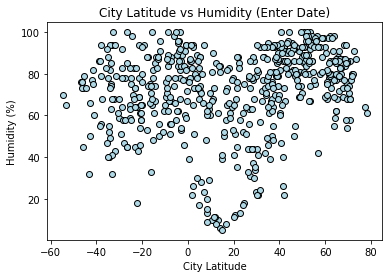

The City Latitude vs Humidity (Enter Date) plot shows the relationship between the Latitude of each city and the humdity on (enter date).
There is no correlation between Humidty (%) and Latiditude.


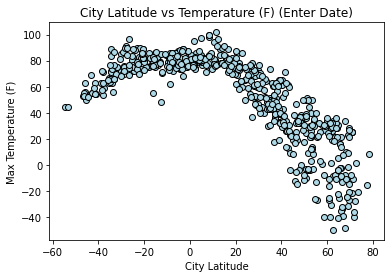

The City Latitude vs Max Temperature (Enter Date) plot shows the relationship between the Latitude of each city and the max temperature on (enter date).
There is a correlation between max temperature and city latiditude. As the city latitude gets closer to 0 degrees, the max temperature rises, but it starts to fall as the latitude of the city moves further from 0 degrees.


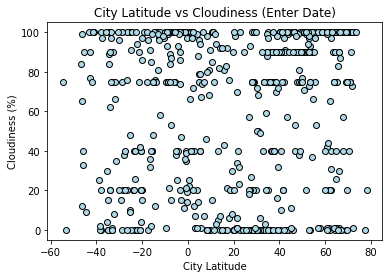

The City Latitude vs Cloudiness (Enter Date) plot shows the relationship between the Latitude of each city and the cloudiness on (enter date).
There is no correlation between Humidty (%) and Latiditude.


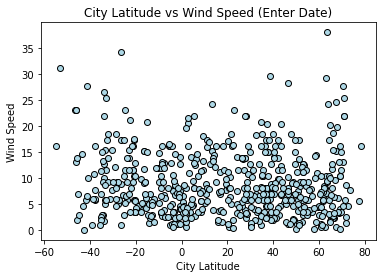

The City Latitude vs Cloudiness (Enter Date) plot shows the relationship between the Latitude of each city and the Wind Speeds on (enter date).
There is no correlation between Wind Speed and Latiditude.


In [10]:
#Your first requirement is to create a series of scatter plots to showcase the following relationships:

#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude
#After each plot add a sentence or too explaining what the code is and analyzing.

#matplotlib plots

y = df["Humidity"].values

X = df["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (Enter Date)")
plt.show()

print(f"The City Latitude vs Humidity (Enter Date) plot shows the relationship between the Latitude of each city and the humdity on (enter date).")
print(f"There is no correlation between Humidty (%) and Latiditude.")




y = df["Temp_Max"].values

X = df["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Temperature (F) (Enter Date)")
plt.show()


print(f"The City Latitude vs Max Temperature (Enter Date) plot shows the relationship between the Latitude of each city and the max temperature on (enter date).")
print(f"There is a correlation between max temperature and city latiditude. As the city latitude gets closer to 0 degrees, the max temperature rises, but it starts to fall as the latitude of the city moves further from 0 degrees.")


y = df["Cloudiness"].values

X = df["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (Enter Date)")
plt.show()

print(f"The City Latitude vs Cloudiness (Enter Date) plot shows the relationship between the Latitude of each city and the cloudiness on (enter date).")
print(f"There is no correlation between Humidty (%) and Latiditude.")



y = df["Wind Speed"].values

X = df["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (Enter Date)")
plt.show()


print(f"The City Latitude vs Cloudiness (Enter Date) plot shows the relationship between the Latitude of each city and the Wind Speeds on (enter date).")
print(f"There is no correlation between Wind Speed and Latiditude.")


name           object
Latitude        int64
Longitude     float64
Temp_Max      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

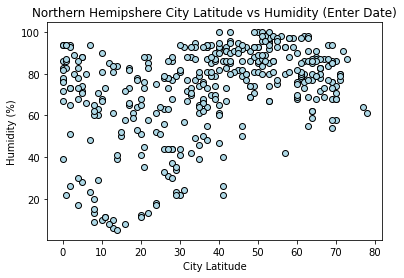

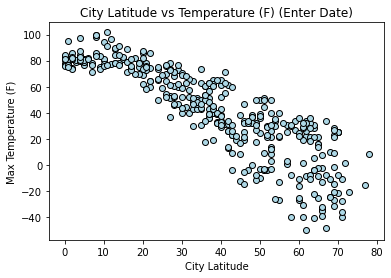

The City Latitude vs Max Temperature (Enter Date) plot shows the relationship between the Latitude of each city and the max temperature on (enter date).
There is a correlation between max temperature and city latiditude. As the city latitude gets closer to 0 degrees, the max temperature rises, but it starts to fall as the latitude of the city moves further from 0 degrees.


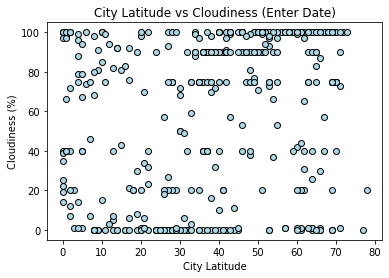

The City Latitude vs Cloudiness (Enter Date) plot shows the relationship between the Latitude of each city and the cloudiness on (enter date).
There is no correlation between Humidty (%) and Latiditude.


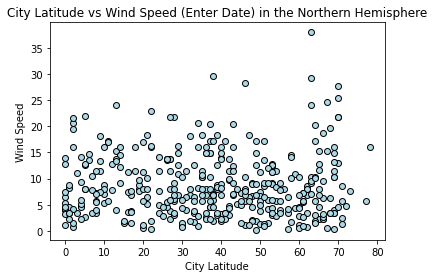

In [11]:
#Your second requirement is to run linear regression on each relationship, only this time separating them
#into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.


#Northern Hemisphere - Temperature (F) vs. Latitude Northern Hemisphere (greater than or equal to 0 degrees latitude)

df.keys()

df['Latitude'] = df['Latitude'].astype(int)
display(df.dtypes)

df_north = df[df['Latitude'] >= 0]
df_north

df_south = df[df['Latitude'] <= 0]
df_south

#df['Latitude']  

#df_south = df.drop(df['Latitude']>=0)

#df_south
#df_east
#df_west

y = df_north["Humidity"].values

X = df_north["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemipshere City Latitude vs Humidity (Enter Date)")
plt.show()

y = df_north["Temp_Max"].values

X = df_north["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Temperature (F) (Enter Date)")
plt.show()


print(f"The City Latitude vs Max Temperature (Enter Date) plot shows the relationship between the Latitude of each city and the max temperature on (enter date).")
print(f"There is a correlation between max temperature and city latiditude. As the city latitude gets closer to 0 degrees, the max temperature rises, but it starts to fall as the latitude of the city moves further from 0 degrees.")


y = df_north["Cloudiness"].values

X = df_north["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (Enter Date)")
plt.show()

print(f"The City Latitude vs Cloudiness (Enter Date) plot shows the relationship between the Latitude of each city and the cloudiness on (enter date).")
print(f"There is no correlation between Humidty (%) and Latiditude.")



y = df_north["Wind Speed"].values

X = df_north["Latitude"]
X = [[e] for e in X]

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (Enter Date) in the Northern Hemisphere")
plt.show()
                   


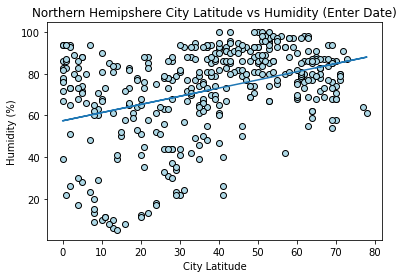

In [13]:
#model = LinearRegression()
#model.fit(X,y)
#model.coef_
#model.intercept_
#r_squared = model.score(X,y)
#predictions = model.predict(X)

y = df_north["Humidity"].values

X = df_north["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemipshere City Latitude vs Humidity (Enter Date)")
plt.plot(X,predictions)
plt.show()

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

#------------------------------------------------------------

# y = df_south["Temp_Max"].values

# X = df_south["Latitude"]
# X = [[e] for e in X]

# plt.scatter(X,y , color = "lightblue", edgecolors = "black")
# plt.xlabel("City Latitude")
# plt.ylabel("Max Temperature (F)")
# plt.title("South Hemisphere City Latitude vs Temperature (F) (Enter Date)")
# plt.show()

# model = LinearRegression()
# model.fit(X,y)
# model.coef_
# model.intercept_
# r_squared = model.score(X,y)
# predictions = model.predict(X)

# print (X)


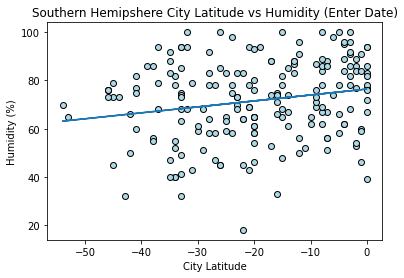

In [14]:
df_south = df[df['Latitude'] <= 0]
y = df_south["Humidity"].values

X = df_south["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemipshere City Latitude vs Humidity (Enter Date)")
plt.plot(X,predictions)
plt.show()

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)



In [ ]:
# x = df["Latitude"].to_list()
# # x_north = []
# for num in x:
#     if num >= 0:
#         x_north.append(num)

# print(x_north)

        
#df.loc["Latitude" >= "1"]

In [ ]:
y = df["Humidity"].values

x = df["Latitude"].to_list()
x_north = []
for num in x:
    if num >= 0:
        x_north.append(num)
X = [[num] for num in x_north]

                   
#y = df["Humidity"].values

#x = df["Latitude"].to_list()
#x_north = []

#X = [[num] for num in x_north]



#model = LinearRegression()
#model.fit(X,y)
#model.coef_
#model.intercept_
#r_squared = model.score(X,y)
#predictions = model.predict(X)

#plt.scatter(X,y , color = "lightblue", edgecolors = "black")
#plt.xlabel("City Latitude")
#plt.ylabel("Humidity (%)")
#plt.title("City Latitude vs Humidity (Enter Date)")
#plt.plot(X,predictions)
#plt.show()

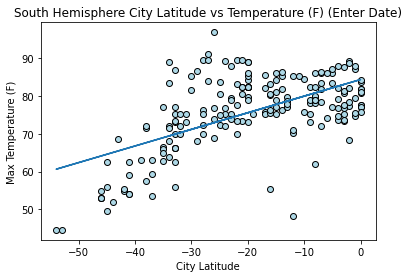

[[-34], [-21], [-23], [-54], [-14], [-46], [-45], [-31], [-33], [-17], [-45], [-15], [-33], [-7], [-21], [-39], [-20], [-37], [-20], [-8], [-3], [-42], [-9], [-20], [-33], [-32], [-20], [-16], [-22], [-17], [-15], [-46], [-33], [-5], [-46], [-53], [0], [0], [-4], [-33], [-2], [-35], [-8], [-34], [-25], [0], [-24], [-2], [0], [-16], [-14], [-34], [-21], [-4], [-5], [-3], [-24], [0], [-27], [-25], [-7], [-19], [-38], [-33], [0], [-7], [-46], [-20], [-34], [-34], [-16], [-42], [-26], [-28], [-26], [-13], [-41], [-15], [-32], [-30], [-28], [-7], [-3], [-21], [-20], [-6], [-23], [-17], [-22], [-3], [-20], [-3], [-21], [-2], [-33], [-35], [-13], [-4], [-14], [-20], [0], [-28], [-32], [-2], [-20], [-8], [-10], [0], [-23], [-24], [-31], [-23], [-45], [-9], [-12], [-33], [-9], [-12], [-34], [-8], [-37], [-2], [-25], [-41], [-33], [-15], [-10], [-20], [-13], [-37], [-17], [0], [-29], [-28], [-16], [-24], [-1], [-8], [-1], [0], [-1], [-8], [-44], [-7], [-7], [-20], [-1], [-38], [-1], [-4], [-43],

In [16]:
y = df_south["Temp_Max"].values

X = df_south["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("South Hemisphere City Latitude vs Temperature (F) (Enter Date)")
plt.plot(X,predictions)
plt.show()

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

print (X)


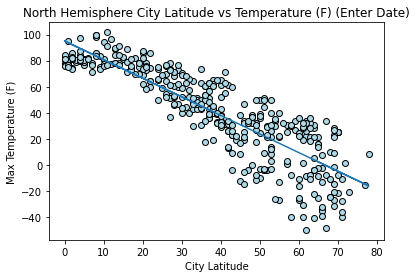

In [17]:
y = df_north["Temp_Max"].values

X = df_north["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("North Hemisphere City Latitude vs Temperature (F) (Enter Date)")
plt.plot(X,predictions)
plt.show()


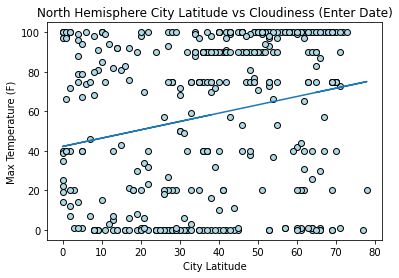

In [23]:
y = df_north["Cloudiness"].values

X = df_north["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("North Hemisphere City Latitude vs Cloudiness (Enter Date)")
plt.plot(X,predictions)
plt.show()

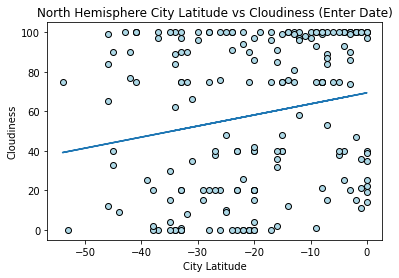

In [20]:
y = df_south["Cloudiness"].values

X = df_south["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hemisphere City Latitude vs Cloudiness (Enter Date)")
plt.plot(X,predictions)
plt.show()

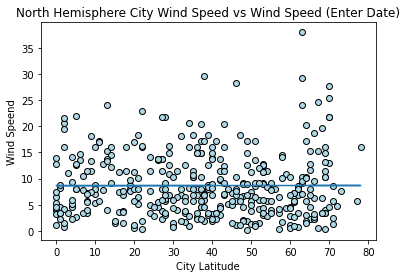

In [22]:
y = df_north["Wind Speed"].values

X = df_north["Latitude"]
X = [[e] for e in X]

model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "lightblue", edgecolors = "black")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speend")
plt.title("North Hemisphere City Wind Speed vs Wind Speed (Enter Date)")
plt.plot(X,predictions)
plt.show()